#### Description

Parkinson's disease is a progressive disorder that affects the nervous system and the parts of the body controlled by the nerves. Symptoms start slowly. The first symptom may be a barely noticeable tremor in just one hand. Tremors are common, but the disorder may also cause stiffness or slowing of movement.

One of the major early symptom or sign of Parkinson's is changes in speach. Patients are found to speak softly, quickly, slur or hesistate before talking. The speech may be more monotone compared to the usual speech patterns.

Hence, this project uses a publicly available dataset created my Max Little of University of Oxford, in collaboration with the National Center for Voice and Speech, Colorado, who recorded speech signals. The dataset has a total of 23 features related to speech, with each sample classified. The labels are under the column "status"

In [36]:
# import necessary libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
#import lux


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# importing data

df = pd.read_csv('parkinsons.data', sep=',')
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# checking feature details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
# list all unique values for reference

for col in df:
    print("-----------------" + col + "-----------------")
    print(df[col].unique())
    print("---------------------------------------------")

-----------------name-----------------
['phon_R01_S01_1' 'phon_R01_S01_2' 'phon_R01_S01_3' 'phon_R01_S01_4'
 'phon_R01_S01_5' 'phon_R01_S01_6' 'phon_R01_S02_1' 'phon_R01_S02_2'
 'phon_R01_S02_3' 'phon_R01_S02_4' 'phon_R01_S02_5' 'phon_R01_S02_6'
 'phon_R01_S04_1' 'phon_R01_S04_2' 'phon_R01_S04_3' 'phon_R01_S04_4'
 'phon_R01_S04_5' 'phon_R01_S04_6' 'phon_R01_S05_1' 'phon_R01_S05_2'
 'phon_R01_S05_3' 'phon_R01_S05_4' 'phon_R01_S05_5' 'phon_R01_S05_6'
 'phon_R01_S06_1' 'phon_R01_S06_2' 'phon_R01_S06_3' 'phon_R01_S06_4'
 'phon_R01_S06_5' 'phon_R01_S06_6' 'phon_R01_S07_1' 'phon_R01_S07_2'
 'phon_R01_S07_3' 'phon_R01_S07_4' 'phon_R01_S07_5' 'phon_R01_S07_6'
 'phon_R01_S08_1' 'phon_R01_S08_2' 'phon_R01_S08_3' 'phon_R01_S08_4'
 'phon_R01_S08_5' 'phon_R01_S08_6' 'phon_R01_S10_1' 'phon_R01_S10_2'
 'phon_R01_S10_3' 'phon_R01_S10_4' 'phon_R01_S10_5' 'phon_R01_S10_6'
 'phon_R01_S13_1' 'phon_R01_S13_2' 'phon_R01_S13_3' 'phon_R01_S13_4'
 'phon_R01_S13_5' 'phon_R01_S13_6' 'phon_R01_S16_1' 'phon_R01_S1

Axes(0.125,0.11;0.775x0.77)


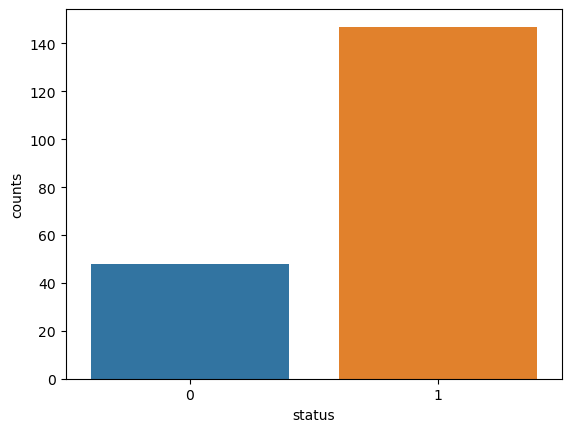

In [8]:
# exploring label imbalance

temp_series = df['status'].value_counts()
temp_df = pd.DataFrame({'status':temp_series.index, 'counts':temp_series.values})

print(sns.barplot(x='status', y='counts', data=temp_df))

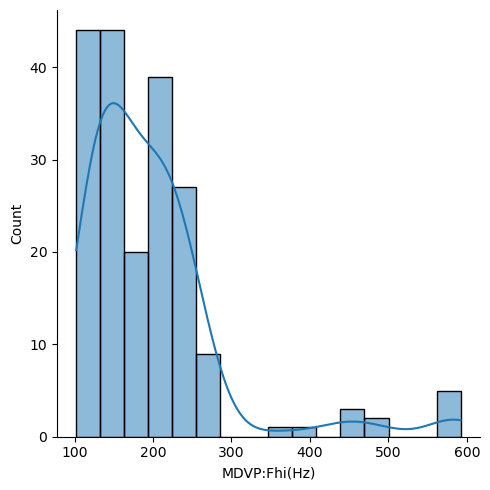

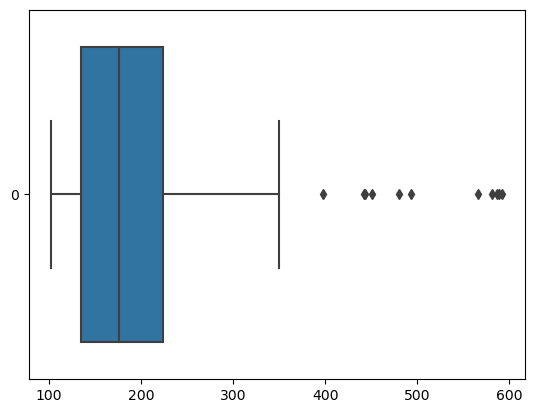

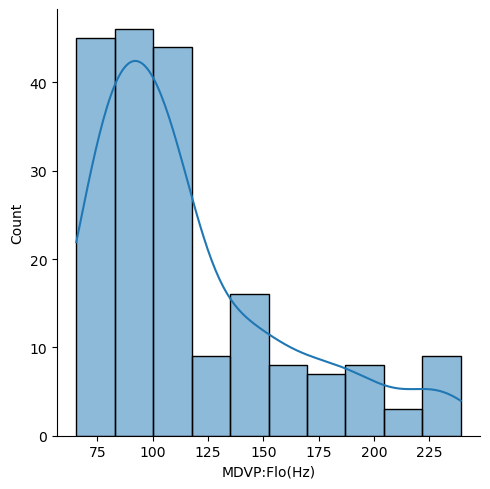

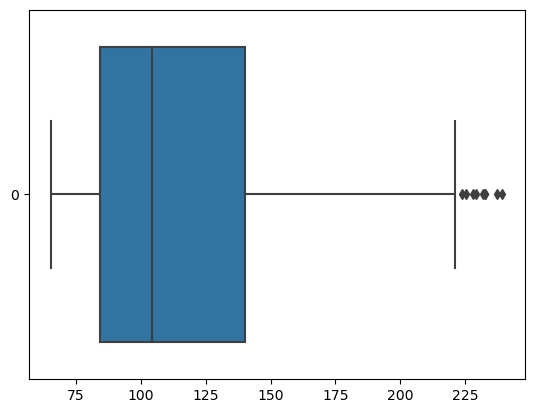

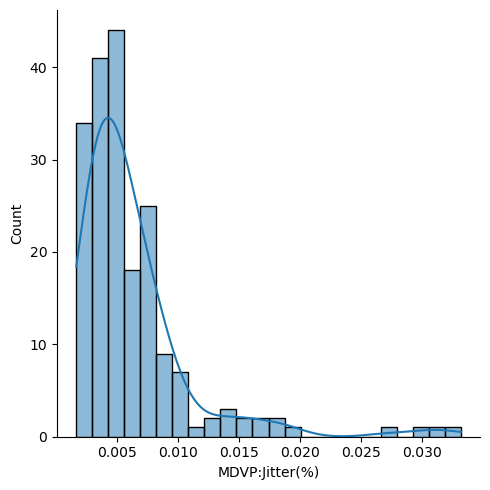

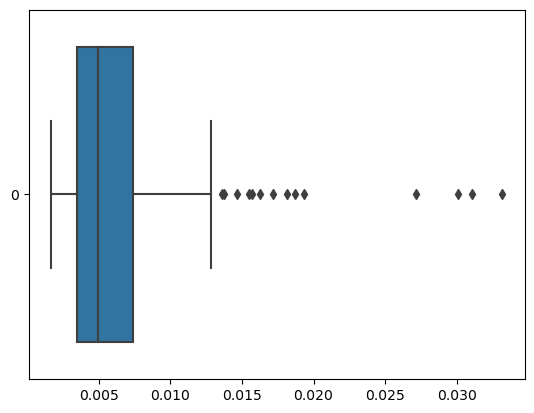

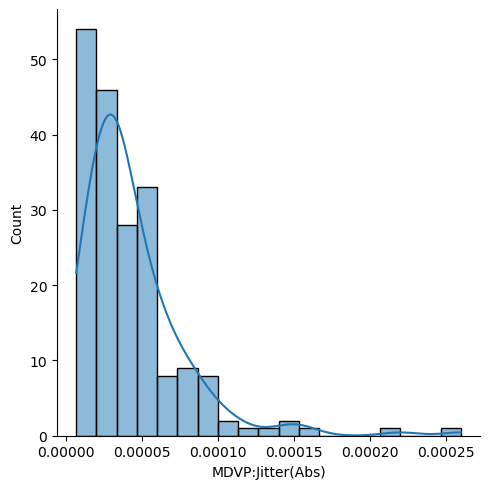

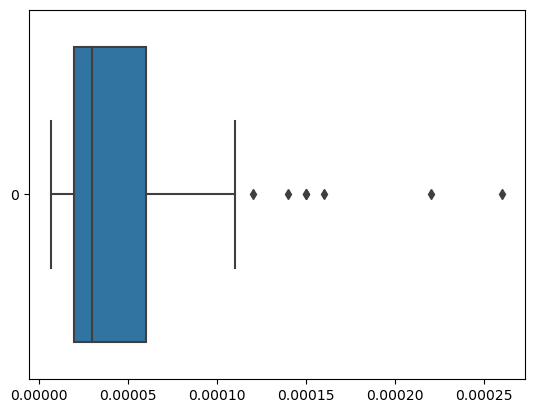

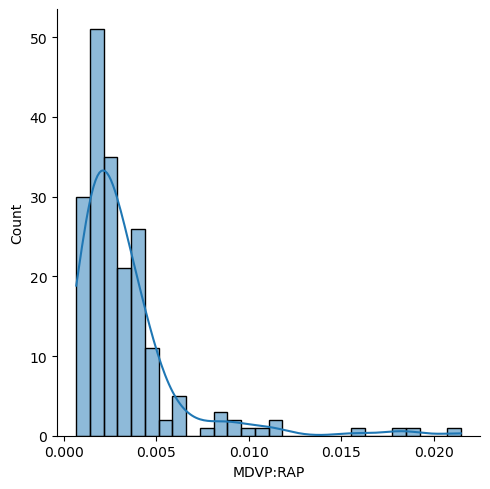

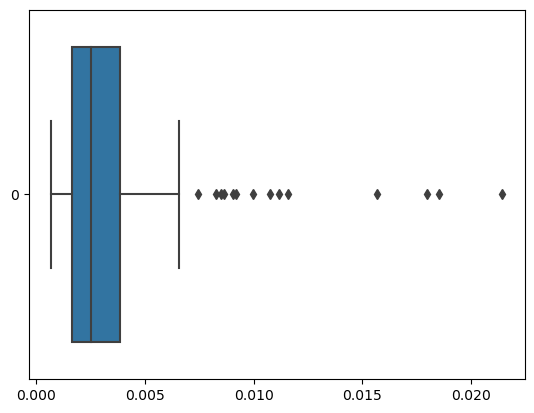

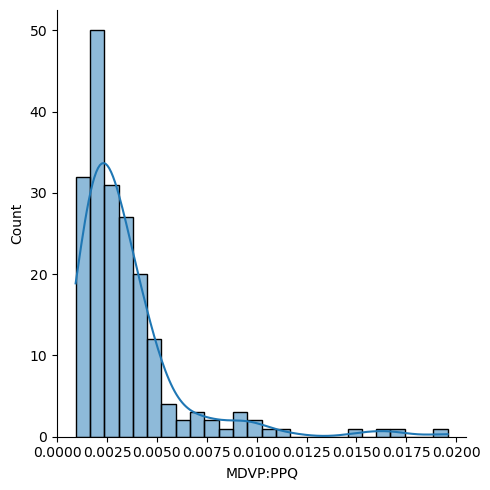

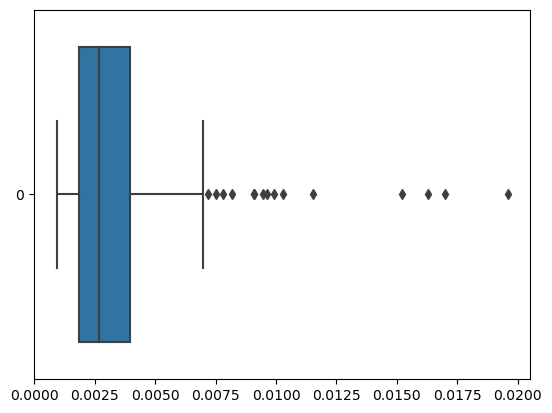

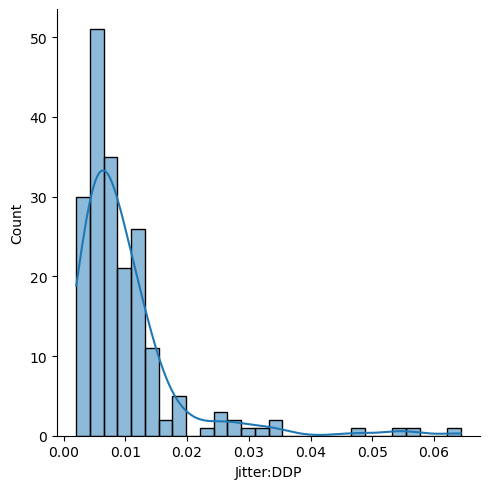

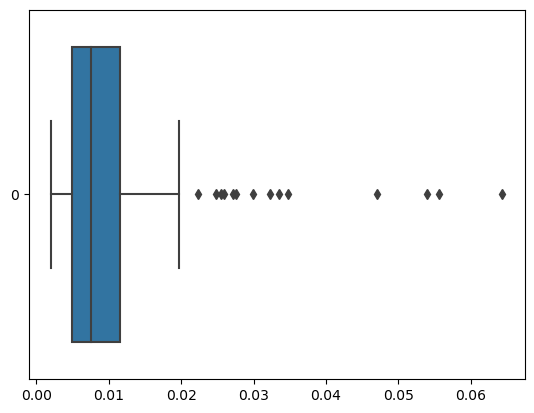

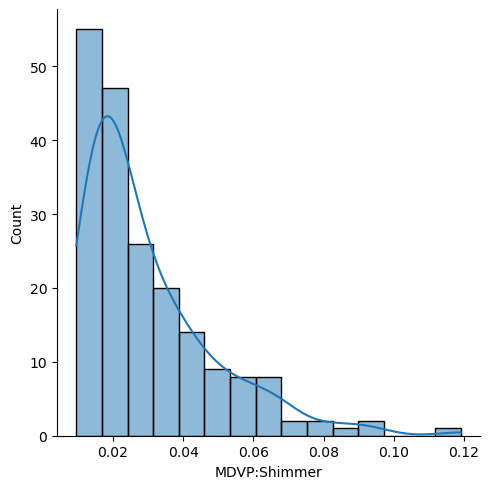

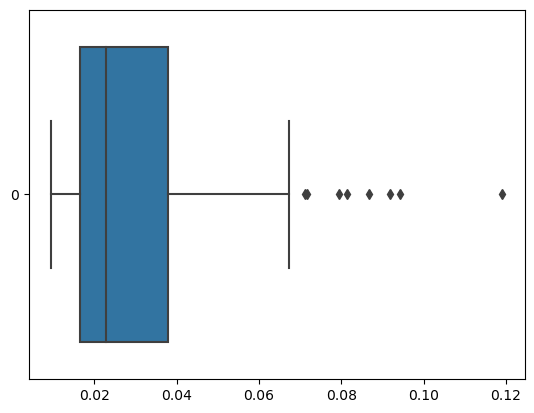

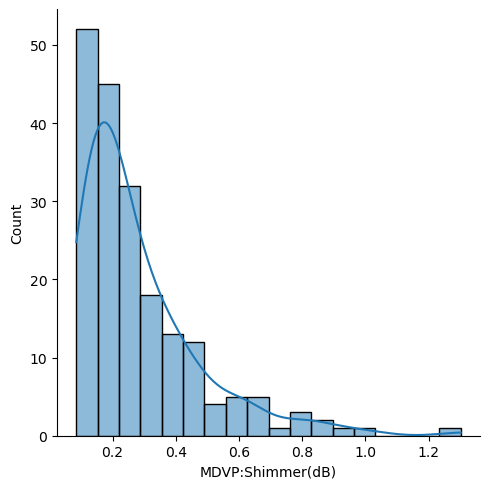

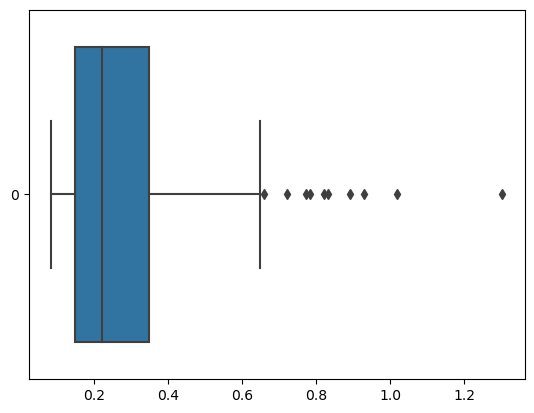

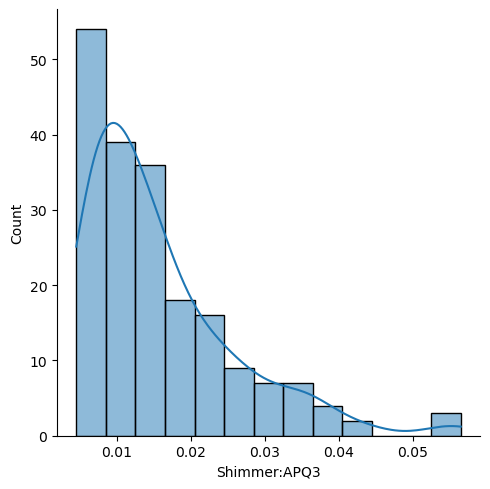

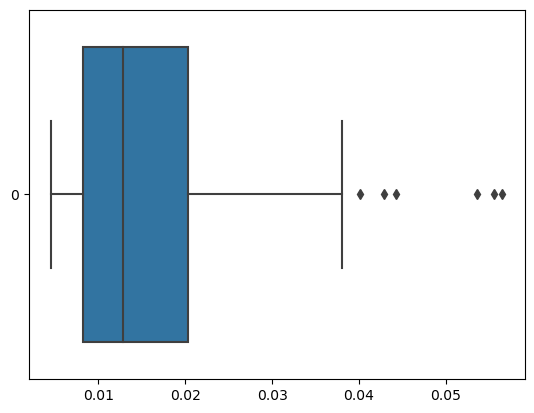

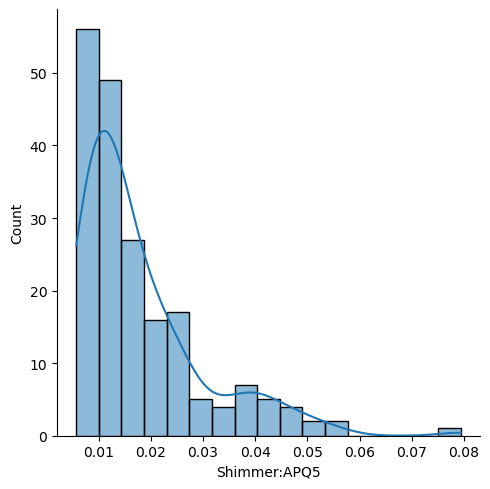

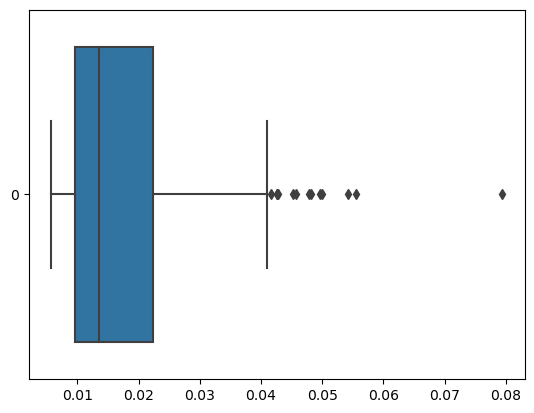

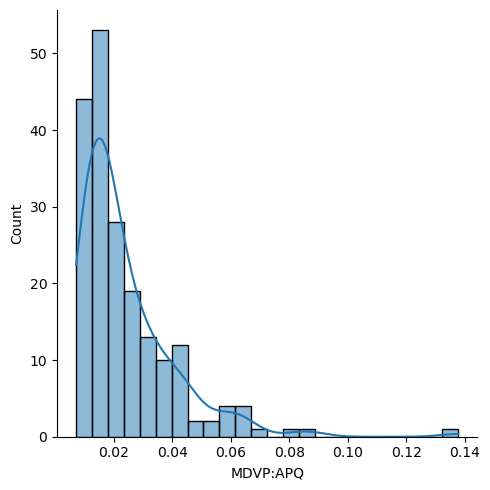

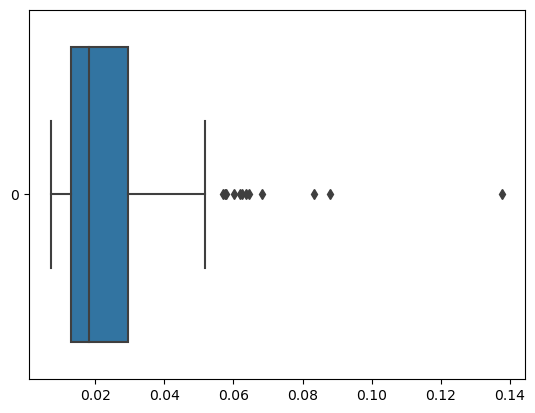

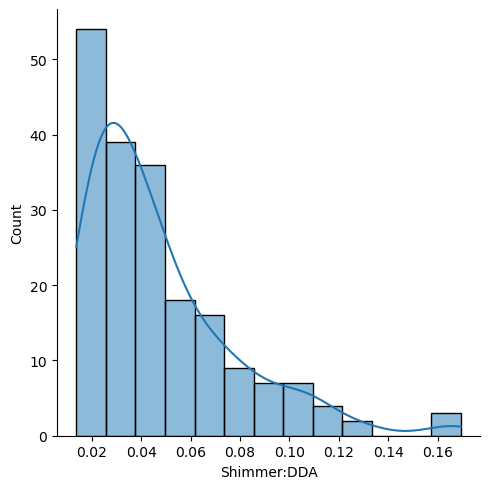

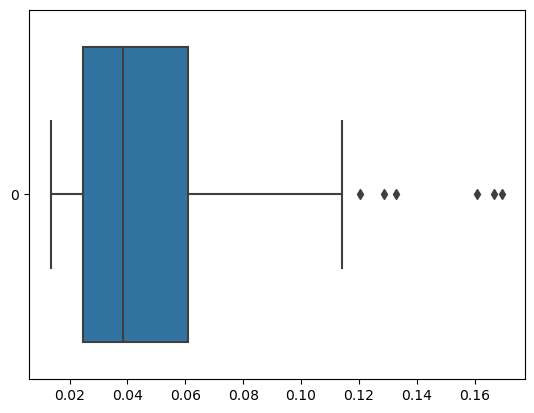

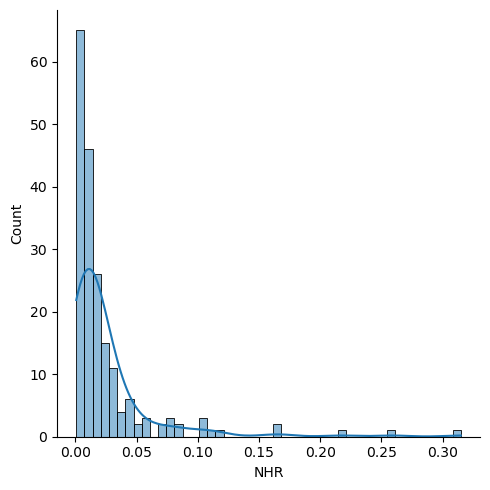

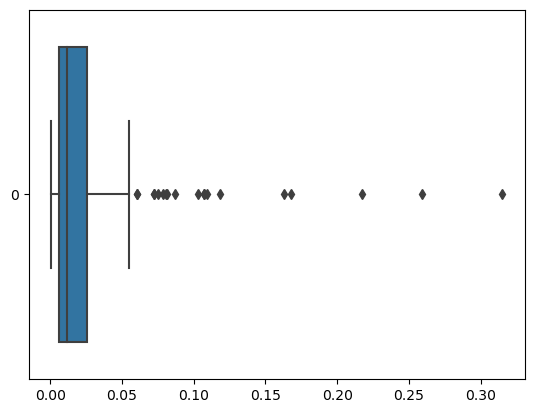

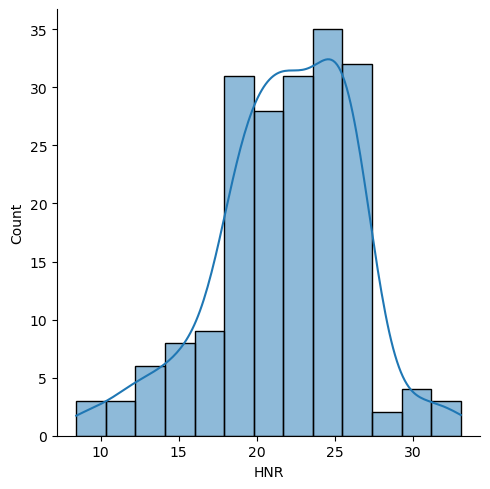

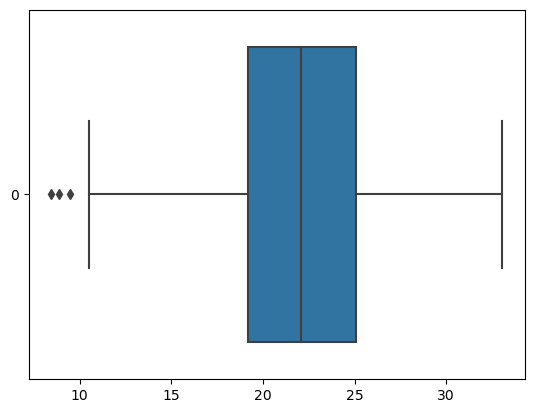

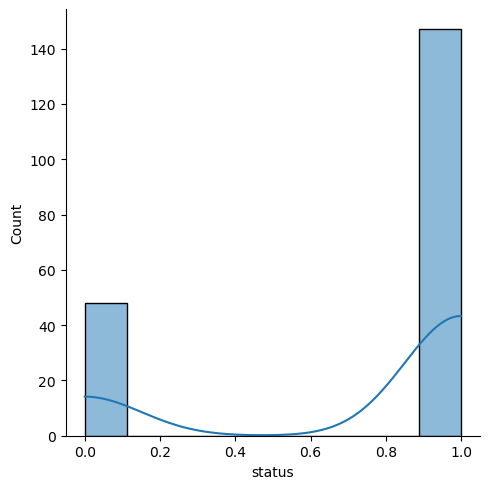

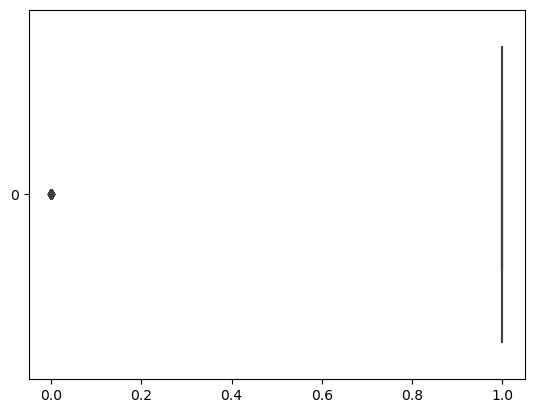

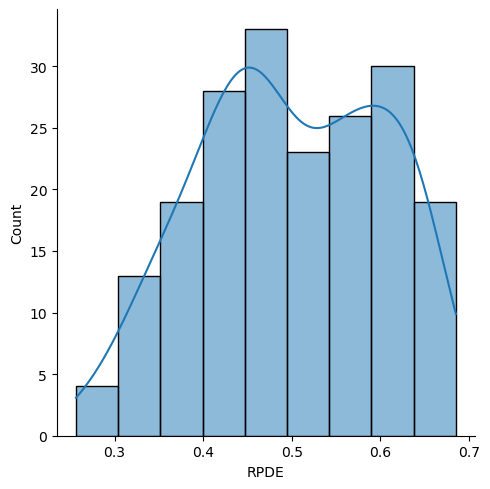

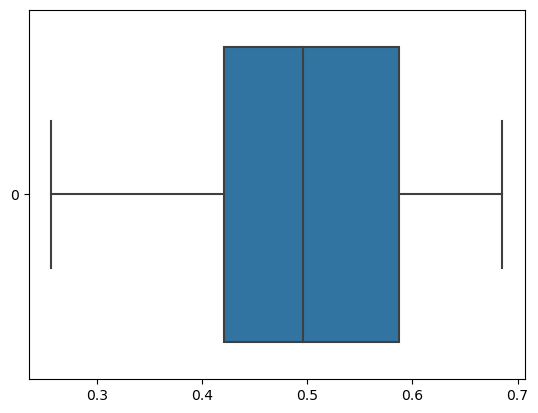

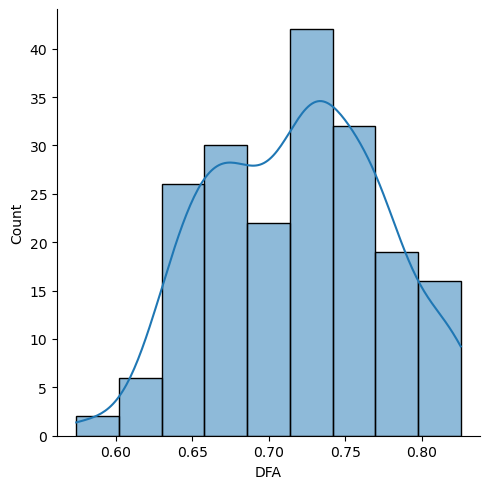

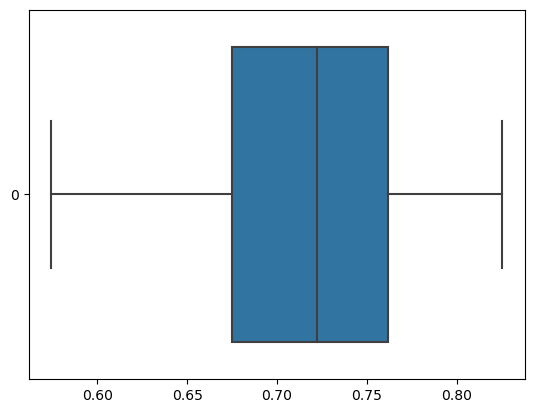

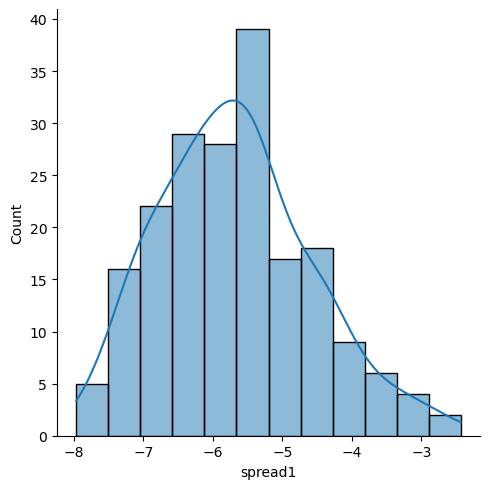

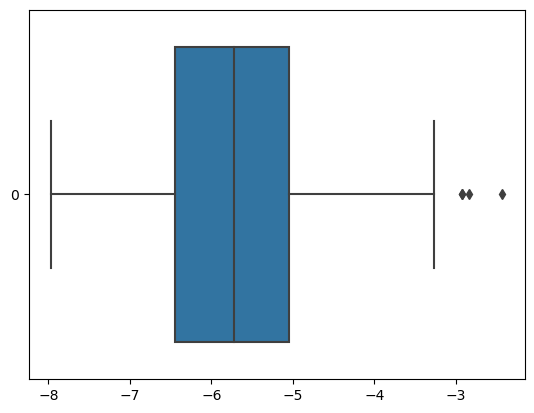

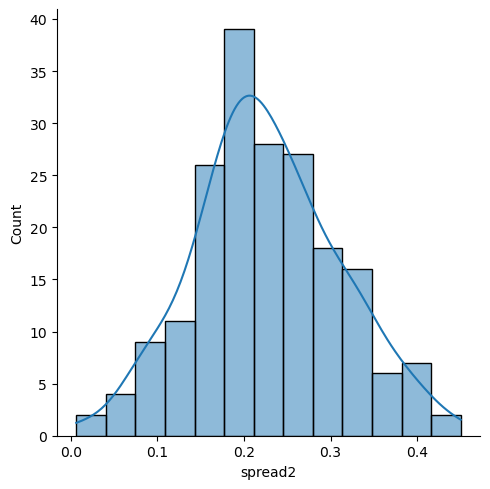

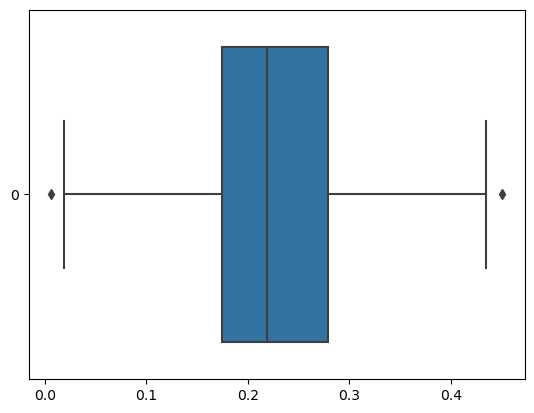

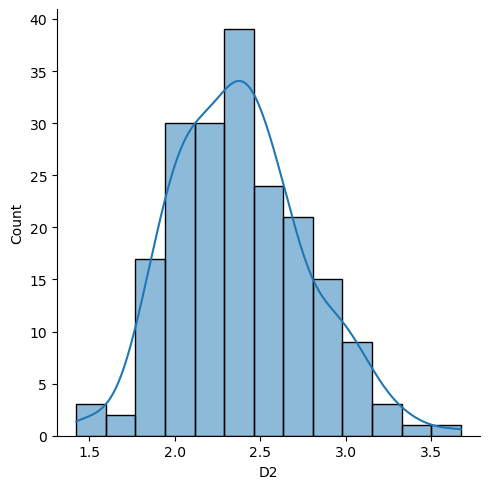

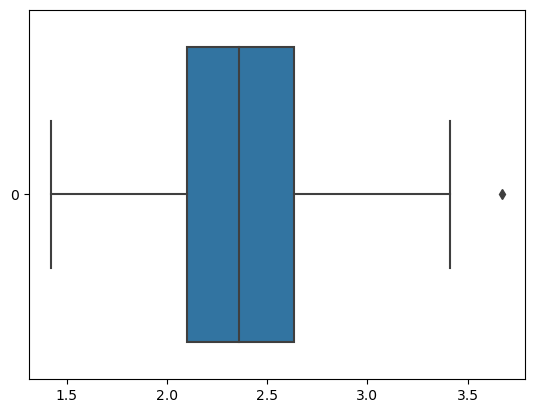

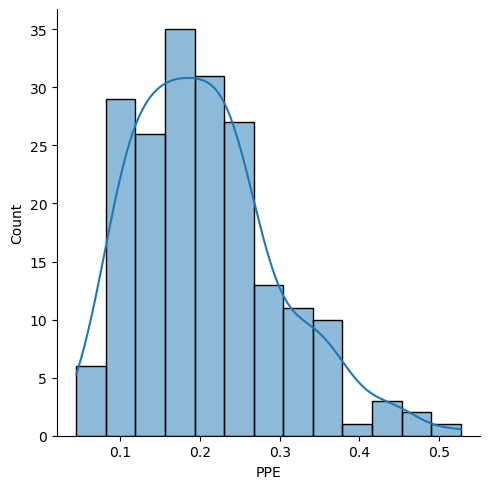

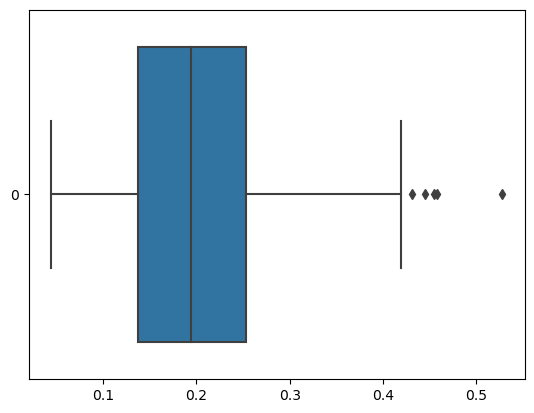

In [15]:
# Data distribution
for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    sns.displot(df[i],kde=True)    
    plt.show()
    sns.boxplot(df[i], orient='h')

C:\Users\nshet\AppData\Local\Temp\ipykernel_36472\4103280222.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

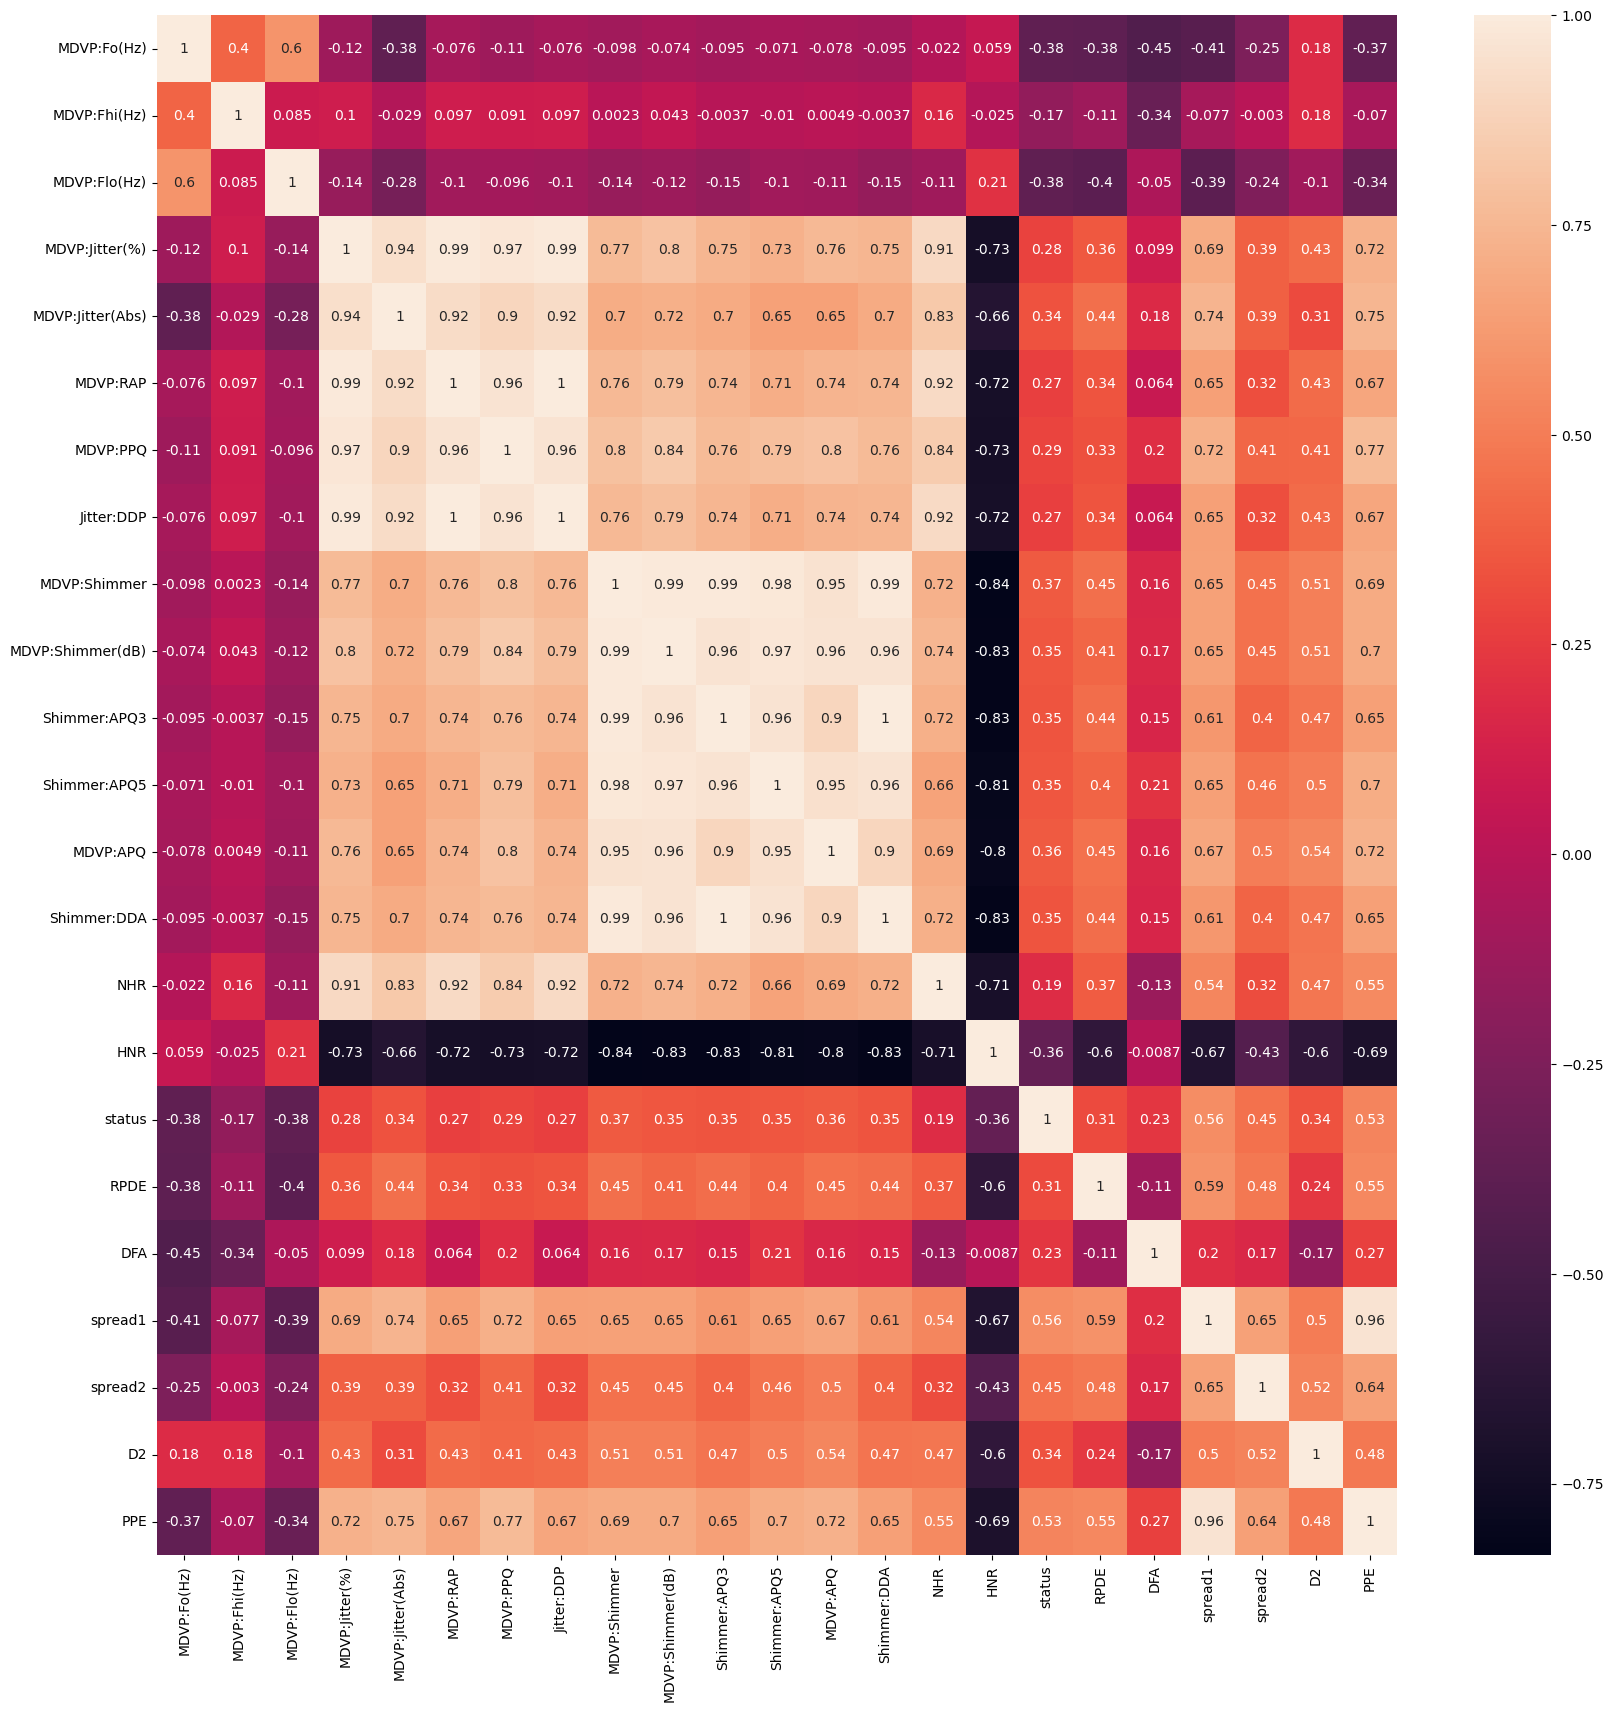

In [16]:
# correlations

plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True)


In [26]:
# Create labels and features
x = df.drop(["status","name"], axis=1)
y = df["status"]

In [27]:
# Balance the labels
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print("Count of samples per label: ", Counter(y))

over_sampler = RandomOverSampler()
x_os, y_os = over_sampler.fit_resample(x,y)

print("Count of samples per lable post resampling: ", Counter(y_os))

# Standardize or scale data
scaler = MinMaxScaler((-1,1))
x_scaled = scaler.fit_transform(x_os)
y = y_os

Count of samples per label:  Counter({1: 147, 0: 48})
Count of samples per lable post resampling:  Counter({1: 147, 0: 147})


In [28]:
# Feature reduction through principal component analysis
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x_scaled)

print(x_scaled.shape)
print(x_pca.shape)


# Split data for training and testing
x_train,x_test, y_train,y_test = train_test_split(x_pca, y, test_size=0.2, random_state=7)

(294, 22)
(294, 8)


           Method Used  Accuracy
0  Logistic Regression  0.864407
1        Decision Tree  0.966102
2        Random Forest  0.983051
3                  SVM  0.949153
4                  KNN  1.000000
5                  GNB  0.881356
6                  XGB  0.966102
Axes(0.125,0.11;0.775x0.77)


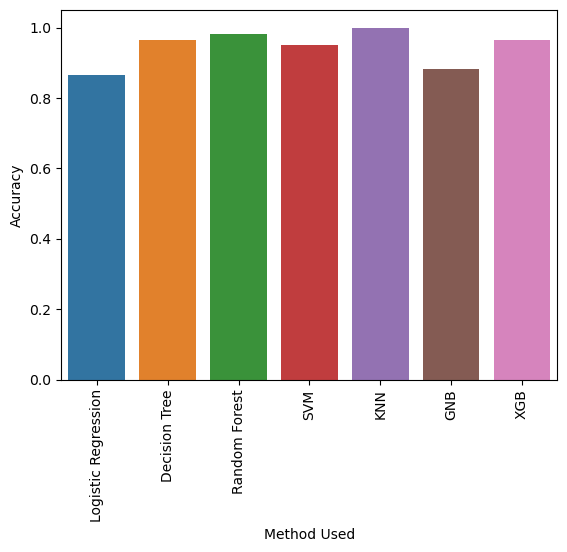

In [45]:
# Training
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


# Logistic Regression
from sklearn.linear_model import LogisticRegression
#train
classifier_LR = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier_LR.fit(x_train, y_train)
#test
y_pred_LR = classifier_LR.predict(x_test)
# check accuracy
acc_LR = accuracy_score(y_test, y_pred_LR)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# train
classifier_DT = DecisionTreeClassifier(random_state=14)
dt = classifier_DT.fit(x_train,y_train)
y_pred_DT = classifier_DT.predict(x_test)
acc_DT= accuracy_score(y_test, y_pred_DT)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier_RF = RandomForestClassifier(criterion='entropy')
rfc = classifier_RF.fit(x_train, y_train)
y_pred_RF = classifier_RF.predict(x_test)
acc_RF = accuracy_score(y_test, y_pred_RF)

# Support Vector Machining
from sklearn.svm import SVC

model_SVM = SVC(cache_size=100, probability=True)
svm = model_SVM.fit(x_train, y_train)
y_pred_SVM = model_SVM.predict(x_test)
acc_SVM = accuracy_score(y_test, y_pred_SVM)

# KNN 
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=3)
knn = model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)
acc_KNN = accuracy_score(y_test, y_pred_KNN)

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
y_pred_GNB = gnb.predict(x_test)
acc_GNB = accuracy_score(y_test, y_pred_GNB)


# Assemble all classifiers and train a voting classifier
from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators= [('LR',lr), ('DT',dt), ("RF",rfc), 
                                    ("SVM",svm), ("KNN",knn), ("GNB",gnb) ],
                                    voting='hard',
                                    flatten_transform=True)
model_evc = evc.fit(x_train, y_train)
y_pred_evc = model_evc.predict(x_test)
acc_evc = accuracy_score(y_test, y_pred_evc)


# XG Boot Classifier
from xgboost import XGBClassifier

model_XGB = XGBClassifier()
xgb = model_XGB.fit(x_train, y_train)
y_pred_XGB = model_XGB.predict(x_test)
acc_XGB = accuracy_score(y_test, y_pred_XGB)      
    
# Visualize results of training and tesing

model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'GNB', 'XGB'] 
acc_scores = [acc_LR, acc_DT, acc_RF, acc_SVM, acc_KNN, acc_GNB, acc_XGB]
classifiers = [classifier_LR, classifier_DT, classifier_RF, model_SVM, model_KNN, gnb, xgb]

df_acc = pd.DataFrame({'Method Used':model_name, 'Accuracy':acc_scores})
print(df_acc)

chart = sns.barplot(x='Method Used', y='Accuracy', data=df_acc)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)



In [46]:
# Results
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

for model in classifiers:
    print("--------------------------------  ", model, "  --------------------------------" )
    print(classification_report(y_test, model.predict(x_test)))
    print("-----------")
    print("Confusion Matrix")
    print(confusion_matrix(y_test, model.predict(x_test)))
 



--------------------------------   LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')   --------------------------------
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.94      0.83      0.88        35

    accuracy                           0.86        59
   macro avg       0.86      0.87      0.86        59
weighted avg       0.87      0.86      0.87        59

-----------
Confusion Matrix
[[22  2]
 [ 6 29]]
--------------------------------   DecisionTreeClassifier(random_state=14)   --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.94      0.97        35

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

-----------
Confusion Matrix
[[24  0]
 [ 2 33]]
---------



----------- Logistic Regression -----------


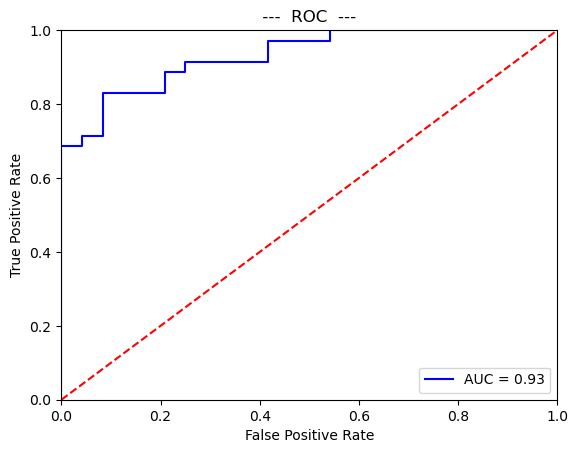



----------- Decision Tree -----------


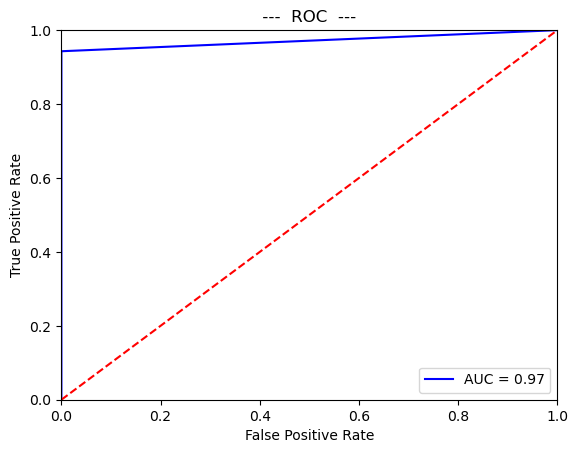



----------- Random Forest -----------


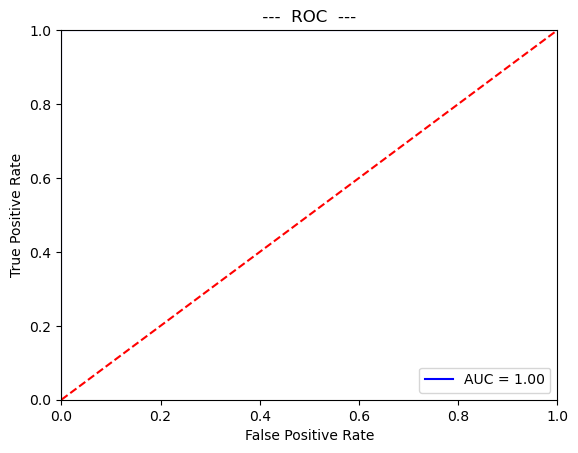



----------- SVM -----------


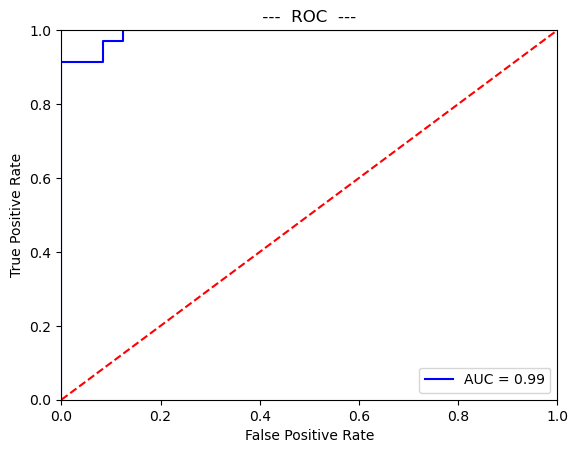



----------- KNN -----------


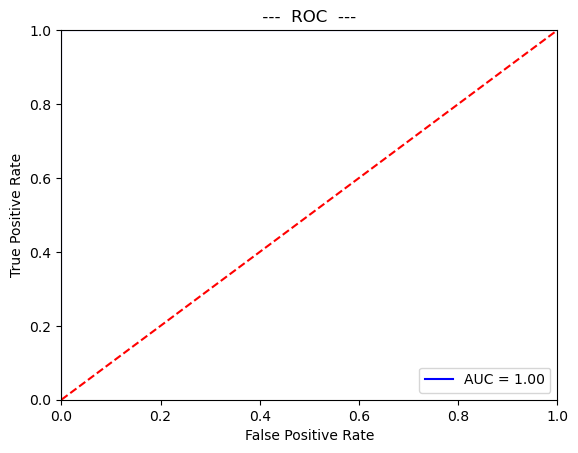



----------- GNB -----------


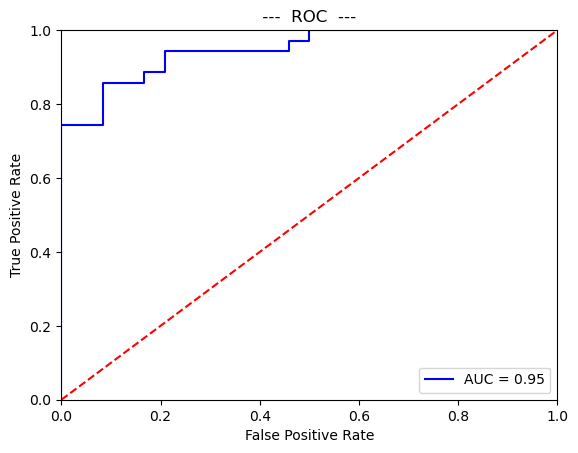



----------- XGB -----------


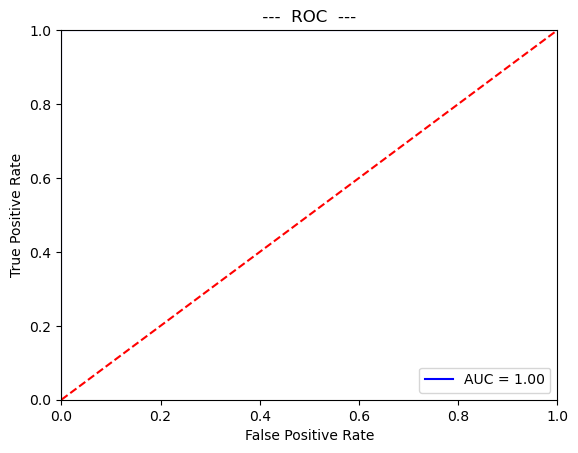

In [47]:
# Receiver Operating Charecteristic curve
from sklearn.metrics import roc_curve, auc

def cal_and_display_roc(model, x_test, y_test):
    prob = model.predict_proba(np.array(x_test))
    fpr, tpr, threshold = roc_curve(y_test, prob[:,1])
    roc_auc = auc(fpr, tpr)

    plt.title(" ---  ROC  --- ")
    plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


for i,model in enumerate(classifiers):
    #try:
    print("\n")
    print("-----------", model_name[i], "-----------")        
    cal_and_display_roc(model,x_test, np.array(y_test))
    #except:
    #    print('invalid roc')
